# Data Preprocessing:

In [1]:
import pandas as pd

u_data_path = "/Users/bhumikayadav/Downloads/ml-100k/u.data"
u_item_path = "/Users/bhumikayadav/Downloads/ml-100k/u.item"
u_user_path = "/Users/bhumikayadav/Downloads/ml-100k/u.user"

# Loading u.data
column_names = ["user_id", "item_id", "rating", "timestamp"]
df_ratings = pd.read_csv(u_data_path, sep='\t', names=column_names, engine='python')

# Loading u.item
item_columns = ["movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL"] + [
    "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", 
    "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
df_movies = pd.read_csv(u_item_path, sep='|', encoding='latin-1', names=item_columns, usecols=range(24), engine='python')

# Loading u.user
user_columns = ["user_id", "age", "gender", "occupation", "zip_code"]
df_users = pd.read_csv(u_user_path, sep='|', names=user_columns, engine='python')

In [2]:
# Display dataset information
print("Ratings Data:")
df_ratings.head()

Ratings Data:


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
print("Movies Data:")
df_movies.head()

Movies Data:


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
print("Users Data:")
df_users.head()

Users Data:


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


To Merge the data used the  common keys (user_id and item_id).

First, merged df_ratings is with df_users using user_id as the common key. This will give us user demographic information to each rating.

After that, merged the result with df_movies, using item_id from df_ratings and movie_id from df_movies. This will give us movie details to the dataset.

In [5]:
# Merge datasets
merged_df = df_ratings.merge(df_users, on="user_id").merge(df_movies, left_on="item_id", right_on="movie_id")

In [6]:
print("Merged Data:")
merged_df.head()

Merged Data:


,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie_id,movie_title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,302,L.A. Confidential (1997),...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,377,Heavyweights (1994),...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,51,Legends of the Fall (1994),...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,346,Jackie Brown (1997),...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis (EDA)

In [7]:
# Basic statistics
n_ratings = len(df_ratings)
n_movies = df_ratings["item_id"].nunique()
n_users = df_ratings["user_id"].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movies: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100000
Number of unique movies: 1682
Number of unique users: 943
Average number of ratings per user: 106.04
Average number of ratings per movie: 59.45


Business Insights: 

- With an average of 59.45 ratings per movie, it suggests that some movies receive a significant number of ratings while others are sparsely rated.

- The average 106.04 ratings per user implies that users actively engage with the platform, but it may be skewed by a small number of highly active users.

- A recommendation system should account for this imbalance to prevent overrepresenting popular movies.

In [8]:
# Top-rated movies
top_rated_movies = merged_df.groupby("movie_title")["rating"].mean().sort_values(ascending=False).head(10)
print("\nTop Rated Movies:")
print(top_rated_movies)


Top Rated Movies:
movie_title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64


Business Insights: 

- All of the top-rated movies have a perfect rating of 5.0, but this could be due to a small number of users rating them.

/var/folders/yq/gdpr03q56dbfhg6wt08vy1bm0000gn/T/ipykernel_62688/2255427749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_df["rating"], palette="viridis")


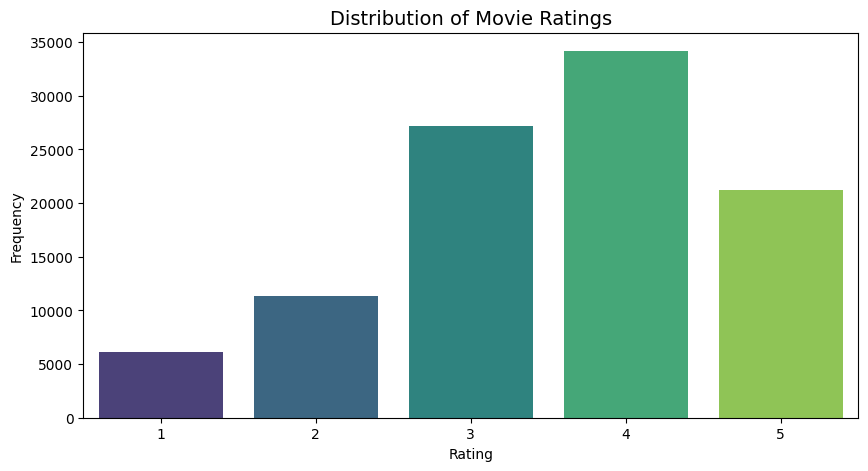

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize rating distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_df["rating"], palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Ratings", fontsize=14)
plt.show()

Business Insights: 

- The histogram shows that ratings are not uniformly distributed- most users tend to rate movies around 3 and 4, while 1-star ratings are the least common.

- This suggests users are generally positive in their reviews and may avoid movies they dislike rather than rating them low.

- Businesses can use this by encouraging more ratings through incentives, ensuring a more balanced rating distribution.

In [10]:
# Mean global rating
print(f"Mean global rating: {round(merged_df['rating'].mean(), 2)}.")

Mean global rating: 3.53.


In [11]:
# Mean rating per user
mean_ratings_per_user = merged_df.groupby("user_id")["rating"].mean()
print(f"Mean rating per user: {round(mean_ratings_per_user.mean(), 2)}.")

Mean rating per user: 3.59.


Business Insights: 

- The mean global rating is 3.53, and the mean rating per user is 3.59, indicating that users tend to be positive in their ratings, with relatively few low scores.

In [12]:
# Most reviewed movies
most_reviewed_movies = merged_df["movie_title"].value_counts().head(10)
print("\nMost Reviewed Movies:")
print(most_reviewed_movies)


Most Reviewed Movies:
movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


Business Insights: 

- Movies like Star Wars (1977), Contact (1997), and Fargo (1996) are among the most reviewed.

- These films are well-known, indicating that popular, widely released movies receive more ratings, while niche movies may go unnoticed.

Business Action: Use collaborative filtering to recommend lesser-known but highly rated movies to users based on their preferences.

In [13]:
from collections import Counter

# Genre Frequency Analysis
genre_columns = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", 
                 "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]

genre_frequency = Counter()
for genre in genre_columns:
    genre_frequency[genre] = df_movies[genre].sum()

print(f"There are {len(genre_frequency)} genres.")
print("The 5 most common genres: \n", genre_frequency.most_common(5))

There are 19 genres.
The 5 most common genres: 
 [('Drama', np.int64(725)), ('Comedy', np.int64(505)), ('Action', np.int64(251)), ('Thriller', np.int64(251)), ('Romance', np.int64(247))]


Business Insights: 

- The five most common genres are Drama, Comedy, Action, Thriller, and Romance.

- Drama and Comedy dominate, making up a significant portion of the movies.

- Business Action: Platforms should focus on acquiring and promoting more content in these popular genres while also ensuring niche genres are available for diversity.

In [14]:
# Lowest and highest rated movies
mean_ratings_per_movie = merged_df.groupby("movie_id")[["rating"]].mean()
lowest_rated = mean_ratings_per_movie["rating"].idxmin()
highest_rated = mean_ratings_per_movie["rating"].idxmax()

print("\nLowest Rated Movie:")
print(df_movies[df_movies['movie_id'] == lowest_rated])

print("\nHighest Rated Movie:")
print(df_movies[df_movies['movie_id'] == highest_rated])



Lowest Rated Movie:
     movie_id                                  movie_title release_date  \
313       314  3 Ninjas: High Noon At Mega Mountain (1998)  01-Jan-1997   

     video_release_date                                           IMDb_URL  \
313                 NaN  http://us.imdb.com/M/title-exact?imdb-title-11...   

     unknown  Action  Adventure  Animation  Children's  ...  Fantasy  \
313        0       1          0          0           1  ...        0   

     Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
313          0       0        0        0        0       0         0    0   

     Western  
313        0  

[1 rows x 24 columns]

Highest Rated Movie:
     movie_id                    movie_title release_date  video_release_date  \
813       814  Great Day in Harlem, A (1994)  01-Jan-1994                 NaN   

                                              IMDb_URL  unknown  Action  \
813  http://us.imdb.com/M/title-exact?Great%20Day%2...      

Business Insights: 

Use sentiment analysis to examine why users rate movies poorly, guiding content selection and platform recommendations.

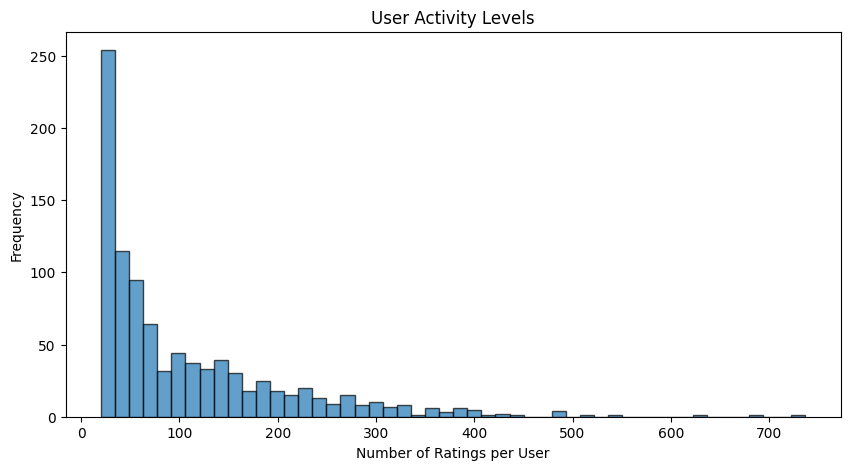

In [15]:
# Visualize user activity levels
user_activity = merged_df["user_id"].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(user_activity, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Frequency")
plt.title("User Activity Levels")
plt.show()

Business Insights: 

- With 100,000 ratings from 943 users, each user has rated around 106 movies on average, showing strong engagement.

- The distribution of user activity follows a long-tail pattern, meaning a small group of users rate many movies while the majority rate only a few.

Business Action: 
- Identify highly active users (potential influencers) and engage them through exclusive previews, rewards, or early access to new content.

- Encourage more user engagement through rating-based rewards or personalized recommendations to sustain interaction.

# Recommendation Techniques:

A. User-Based Collaborative Filtering:

Approach:

Creating a Collaborative Filtering recommendation system that suggests movies based on what similar users have liked. The process involves transforming the data into a user-item matrix, also known as a utility matrix. This matrix will allow us to identify patterns and similarities between users and movies, helping us recommend movies to users.

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from fuzzywuzzy import process

# Create User-Item Rating Matrix
def create_X(df):
    # Number of users and items (movies)
    M = df['user_id'].nunique()
    N = df['movie_id'].nunique()

    # Create mappings between user IDs and item (movie) IDs to indices
    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movie_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movie_id"])))
    
    # Get indices for users and items (movies)
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [movie_mapper[i] for i in df['movie_id']]

    # Create a sparse matrix of ratings
    X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper


- converted the data into a matrix where rows represent users, columns represent movies, and each cell contains the rating a user gave to a movie. If a user hasn't rated a movie, the cell will be empty (this is a sparse matrix).

- This matrix forms the foundation for collaborative filtering, as it helps the system understand which movies each user has liked.

In [17]:
# Compute Cosine Similarity Between Users
def compute_user_similarity(X):
    # Compute similarity between users using cosine similarity
    user_similarity = cosine_similarity(X)
    return user_similarity

- alculates how similar users are to each other. We use cosine similarity to measure this: users who have rated movies similarly (high overlap in ratings) will have high similarity.

- Knowing which users are similar to each other helps us make recommendations. If similar users liked certain movies, the system assumes the target user might like them too.

In [18]:
# Recommend Movies to a User Based on Similar Users
def recommend_movies(user_id, X, user_mapper, user_similarity, n_recommendations=10):
    # Get user index
    user_idx = user_mapper[user_id]
    
    # Get similar users based on cosine similarity
    similar_users = user_similarity[user_idx]
    
    # Get movies rated by similar users
    user_ratings = X[user_idx].toarray().flatten()
    
    # Compute weighted average ratings for movies
    movie_ratings = {}
    for idx, similarity in enumerate(similar_users):
        if idx != user_idx:  # Skip the user themselves
            similar_user_ratings = X[idx].toarray().flatten()
            for movie_idx, rating in enumerate(similar_user_ratings):
                if rating > 0:  # If the movie is rated
                    if movie_idx not in movie_ratings:
                        movie_ratings[movie_idx] = 0
                    movie_ratings[movie_idx] += similarity * rating
    
    # Sort movies by predicted rating (higher ratings first)
    sorted_movie_ratings = sorted(movie_ratings.items(), key=lambda x: x[1], reverse=True)
    
    # Get the top n_recommendations movies
    recommended_movie_ids = [movie[0] for movie in sorted_movie_ratings[:n_recommendations]]
    
    return recommended_movie_ids

- This function recommends movies to a user by looking at ratings from users who are similar to them. It calculates a weighted average rating for each movie, considering the similarity between users and the ratings they gave.

- It enables user-based collaborative filtering. If User A and User B have similar tastes, and User B liked a movie that User A hasn’t seen, the system will recommend it to User A.

In [19]:
# Content-Based Recommendation (Using the provided movie_finder function)
def movie_finder(title, movies):
    all_titles = movies['movie_title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

def get_content_based_recommendations(title_string, n_recommendations=10, movies=None, cosine_sim=None):
    title = movie_finder(title_string, movies)
    idx = movies[movies['movie_title'] == title].index[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:(n_recommendations+1)]  # Exclude the first one (itself)
    similar_movies = [i[0] for i in sim_scores]
    
    print(f"Because you watched {title}:")
    print(movies['movie_title'].iloc[similar_movies])

- This function helps the system recommend movies based on content similarity. It uses the fuzzywuzzy library to find the closest match for a movie title (in case the user types it incorrectly or with small errors). It then looks for movies similar in content (such as genre or release year) to the movie the user is interested in.

- This is a content-based filtering approach. It doesn’t rely on user preferences but instead looks at the movie's characteristics. If the user watched Toy Story, for example, this approach suggests movies that are similar to Toy Story (like other 90s animated movies).

In [20]:
# Create User-Item Rating Matrix
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(merged_df)

# Compute User Similarity
user_similarity = compute_user_similarity(X)

# Recommend movies for a user (example: user_id = 1)
user_id = 1
recommended_movies = recommend_movies(user_id, X, user_mapper, user_similarity, n_recommendations=5)
print("Recommended movies based on similar users:")
for movie_idx in recommended_movies:
    print(movie_inv_mapper[movie_idx])

# Get content-based recommendations for a given movie title
get_content_based_recommendations('Toy Story', n_recommendations=5, movies=merged_df[['movie_id', 'movie_title']], cosine_sim=user_similarity)

Recommended movies based on similar users:
50
181
100
174
98
Because you watched Toy Story (1995):
912             Seven (Se7en) (1995)
747    Independence Day (ID4) (1996)
312                Waterworld (1995)
649                    Ransom (1996)
715              Chamber, The (1996)
Name: movie_title, dtype: object


B. Item-Based Collaborative Filtering:

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Pivot table for item-based collaborative filtering (movies as rows, users as columns)
movie_ratings = merged_df.pivot_table(index='movie_title', columns='user_id', values='rating')

# Fill missing values with 0 (no rating)
movie_ratings = movie_ratings.fillna(0)

# Compute similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(movie_ratings)

# Convert similarity matrix to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=movie_ratings.index, columns=movie_ratings.index)

# Function to recommend similar movies based on a movie the user liked
def recommend_movies(movie_title, top_n=5):
    if movie_title not in similarity_df.columns:
        return "Movie not found in the dataset."
    
    # Get similar movies based on cosine similarity
    similar_movies = similarity_df[movie_title].sort_values(ascending=False)
    
    # Get top N similar movies excluding the movie itself
    similar_movies = similar_movies.drop(movie_title)
    return similar_movies.head(top_n)

# Example usage
movie_title = "Toy Story (1995)"  # Replace with a movie you want to recommend similar ones for
recommended_movies = recommend_movies(movie_title)
print(recommended_movies)


movie_title
Star Wars (1977)                 0.734572
Return of the Jedi (1983)        0.699925
Independence Day (ID4) (1996)    0.689786
Rock, The (1996)                 0.664555
Mission: Impossible (1996)       0.641322
Name: Toy Story (1995), dtype: float64


Approach: 

Created a pivot table: 

- Rows (index): Represent each unique movie (movie_title).

- Columns (columns): Represent each unique user (user_id).

- Values (values): Represent the ratings that users gave to the movies.

After that , calculates the similarity between all pairs of movies in the pivot table. The result is a similarity matrix, where each value represents how similar two movies are to each other based on user ratings.

Builds a function that takes a movie title (movie_title) as input and recommends the top 5 most similar movies:

- Checks if the movie exists: If the movie isn't in the similarity matrix (which can happen if there's a typo or the movie isn't rated by anyone), the function returns an error message.

- Finds similar movies: It looks up the row corresponding to the movie in the similarity matrix (similarity_df[movie_title]) and sorts the similarity values in descending order, so the most similar movies come first.

- Excludes the movie itself: The movie is always most similar to itself, so we drop it from the list of recommendations.

- Returns top 5: It gives the top 5 similar movies (by default, top_n is 5), based on similarity scores.

C. Content-Based Filtering

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine genres into a single string for each movie
genre_columns = ["Action", "Adventure", "Animation", "Children's", "Comedy", 
                 "Crime", "Documentary", "Drama", "Fantasy", 
                 "Film-Noir", "Horror", "Musical", 
                 "Mystery", "Romance", 
                 "Sci-Fi", "Thriller", 
                 "War", "Western"]
merged_df['genres'] = merged_df[genre_columns].apply(lambda row: ' '.join(row.index[row == 1]), axis=1)

# Remove duplicates to focus on unique movies
unique_movies = merged_df[['movie_id', 'movie_title', 'genres']].drop_duplicates()

# Build a TF-IDF vectorizer using genres
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(unique_movies['genres'])

# Function to recommend movies based on genre similarity
def recommend_movies(movie_title, num_recommendations=5):
    # Find the index of the movie in the dataset
    idx = unique_movies.index[unique_movies['movie_title'] == movie_title][0]
    
    # Compute cosine similarity between the selected movie and all others
    cosine_similarities = linear_kernel(tfidf_matrix[idx:idx+1], tfidf_matrix).flatten()
    
    # Get indices of the most similar movies (excluding itself)
    similar_indices = cosine_similarities.argsort()[-num_recommendations-1:-1][::-1]
    
    # Return the titles of the recommended movies
    return unique_movies.iloc[similar_indices]['movie_title'].tolist()

# Example usage:
recommendations = recommend_movies("Toy Story (1995)", num_recommendations=5)
print("Recommended Movies:", recommendations)


Recommended Movies: ['Aladdin and the King of Thieves (1996)', 'Pinocchio (1940)', 'Aristocats, The (1970)', 'Fox and the Hound, The (1981)', 'Gumby: The Movie (1995)']


Content-based filtering recommends movies similar to those a user likes based on their features (genres in this case). It doesn't require user interaction data.

Approach: 

- Combine the genre columns for each movie into a single string (e.g., "Action Comedy Drama"). This step creates a textual representation of the movie's genres, which is essential for building a content-based recommendation system.

- Use TF-IDF (Term Frequency-Inverse Document Frequency) to convert the genre strings into numerical vectors. This helps quantify the importance of each genre for a movie while reducing the impact of common genres across movies. ( TF-IDF and cosine similarity are efficient methods for handling textual data like genres, making it scalable for large datasets.)

- Compute cosine similarity between movies based on their TF-IDF vectors. This measures how similar two movies are based on their genre composition.

- Create a function that takes a movie title as input, finds similar movies using cosine similarity, and returns recommendations.

# Evaluation

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Split data into train and test sets (80/20 split)
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

# Create a pivot table for user-item interactions
train_pivot = train_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
test_pivot = test_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Compute similarity matrix using cosine similarity
user_similarity = cosine_similarity(train_pivot)
user_similarity_df = pd.DataFrame(user_similarity, index=train_pivot.index, columns=train_pivot.index)

# Function to predict ratings based on user similarity
def predict_ratings(user_id, movie_id):
    if user_id in user_similarity_df.index and movie_id in train_pivot.columns:
        similar_users = user_similarity_df[user_id].drop(user_id)  # Exclude the user themselves
        user_ratings = train_pivot.loc[similar_users.index, movie_id]
        weighted_sum = np.dot(similar_users, user_ratings)
        norm_factor = similar_users.sum()
        return weighted_sum / norm_factor if norm_factor > 0 else train_data['rating'].mean()
    else:
        return train_data['rating'].mean()

# Evaluate the model using RMSE and MAE
actual_ratings = []
predicted_ratings = []

for _, row in test_data.iterrows():
    actual_ratings.append(row['rating'])
    predicted_ratings.append(predict_ratings(row['user_id'], row['movie_id']))

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)
print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')


RMSE: 2.9891, MAE: 2.7884


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into train and test sets (80/20 split)
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)

# Create a pivot table for user-item interactions
train_pivot = train_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
test_pivot = test_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Compute similarity matrix using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(train_pivot.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_pivot.columns, columns=train_pivot.columns)

# Function to predict ratings based on item similarity
def predict_ratings(user_id, movie_id):
    if movie_id in item_similarity_df.index:
        similar_scores = item_similarity_df[movie_id].drop(movie_id)  # Exclude the movie itself
        user_ratings = train_pivot.loc[user_id, similar_scores.index]
        weighted_sum = np.dot(similar_scores, user_ratings)
        norm_factor = similar_scores.sum()
        return weighted_sum / norm_factor if norm_factor > 0 else 0
    else:
        return train_data['rating'].mean()

# Evaluate the model using RMSE
actual_ratings = []
predicted_ratings = []

for _, row in test_data.iterrows():
    actual_ratings.append(row['rating'])
    predicted_ratings.append(predict_ratings(row['user_id'], row['movie_id']))

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f'RMSE: {rmse:.4f}')


RMSE: 3.1208
